# Chapter 5 - Exercises

## 1.

m = [1.93939394]
b = [4.73333333]


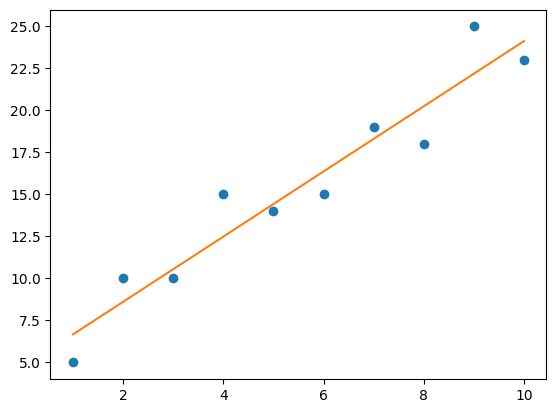

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]
# Extract output column (all rows, last column)
Y = df.values[:, -1]
# Fit a line to the points
fit = LinearRegression().fit(X, Y)
# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten() 
print("m = {0}".format(m)) 
print("b = {0}".format(b))
# show in chart
plt.plot(X, Y, 'o') # scatterplot plt.plot(X, m*X+b) # line plt.show()
plt.plot(X, m*X+b) # line plt.show()
plt.show()

In [30]:
import random 

def f(x):
    return(x-3)**2+4 

def dx_f(x):
    return 2*(x - 3) 

# The learning rate
L = 0.1

# The number of iterations to perform gradient descent
iterations = 100 

# start at a random x
x = random.randint(-15,15) 

for i in range(iterations):

    # get slope
    d_x = dx_f(x)

    # update x by subtracting the (learning rate) * (slope)
    x-=L*d_x
    print(x)

print(x, f(x)) # prints 2.999999999999889 4.0

-9.0
-6.6
-4.68
-3.1439999999999997
-1.9151999999999996
-0.9321599999999997
-0.14572799999999964
0.48341760000000034
0.9867340800000003
1.3893872640000002
1.7115098112000002
1.9692078489600002
2.175366279168
2.3402930233344
2.47223441866752
2.577787534934016
2.6622300279472126
2.7297840223577703
2.7838272178862162
2.827061774308973
2.861649419447178
2.8893195355577426
2.911455628446194
2.9291645027569553
2.9433316022055642
2.954665281764451
2.963732225411561
2.9709857803292485
2.9767886242633987
2.981430899410719
2.985144719528575
2.98811577562286
2.990492620498288
2.9923940963986304
2.993915277118904
2.9951322216951235
2.9961057773560986
2.996884621884879
2.997507697507903
2.9980061580063224
2.998404926405058
2.9987239411240463
2.998979152899237
2.9991833223193898
2.999346657855512
2.9994773262844094
2.9995818610275276
2.999665488822022
2.9997323910576177
2.999785912846094
2.9998287302768754
2.9998629842215
2.9998903873772003
2.9999123099017604
2.9999298479214085
2.9999438783371266
2.

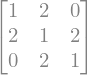

In [31]:
from sympy import *

init_printing()
lamda = symbols('lamda')

a = Matrix([
    [1, 2, 0],
    [2, 1, 2],
    [0, 2, 1],
])
a

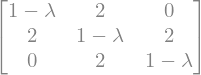

In [32]:
char_m = a - lamda*eye(3)
char_m

In [33]:
char_poly = char_m.det()
char_poly

In [34]:
div(char_poly, (lamda-1), domain='QQ')

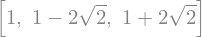

In [35]:
eigenvalues = solve(char_poly, lamda)
eigenvalues

For $\lambda_1$:

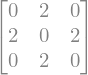

In [36]:
eqsys = a - eigenvalues[0]*eye(3)
eqsys

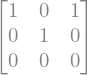

In [37]:
eqsol = eqsys.rref()[0]
eqsol

Eigenvector for $\lambda_1$:

$$
\alpha
\begin{pmatrix}
-1 \\ 0 \\ 1
\end{pmatrix}
$$

For $\lambda_2$:

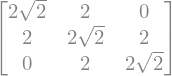

In [38]:
eqsys = a - eigenvalues[1]*eye(3)
eqsys

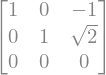

In [39]:
eqsol = eqsys.rref()[0]
eqsol

Eigenvector for $\lambda_2$:

$$
\alpha
\begin{pmatrix}
1 \\ -\sqrt{2} \\ 1
\end{pmatrix}
$$